<a href="https://colab.research.google.com/github/ana-ra/Imers-o-de-dados---Alura/blob/main/Merge_de_dados_e_an%C3%A1lise_de_resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instrutores: Guilherme Silveira, Thiago Santos, Vanessa Leiko

Desafio 01: Encontrar o top 10, das ações do MOA (inibidor, agonista...)

Desafio 02: Criar a coluna eh_controle para quando na linha tratamento == com_controle

Desafio 03: Criar três colunas para indicar o tempo 24, 48, 72

Desafio 04: Estudar sobre combinações de DF https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Desafio 05: Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições (Escolher uma droga e comparar com controle)

Desafio 06: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA

Desafio 07: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa MOAs diferentes

Desafio 08: Resumo do que você aprendeu com os dados

In [ ]:
#Importando as ferramentas que serao utilizadas para os tratamentos de dados 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
url_resultados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true'

df_dados = pd.read_csv(url_dados, compression = 'zip')
df_resultados = pd.read_csv(url_resultados)

In [ ]:
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

In [ ]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


In [ ]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


In [ ]:
print(df_resultados['vitamin_b'].unique())
print(df_resultados['acat_inhibitor'].unique())

[0 1]
[0 1]


Cada linha é o resultado do experimento da outra base de dados dos experimentos que trabalhamos. Quando um determinado mecanismo de ação é ativado ele é indicado como 1. Quando esse mecanismo de ação não é ativado ele é detectado como 0. Sendo assim todo resultado que obtivermos o número 1, saberemos que ele foi ativado.

 **qual foi o mecanismo de ação que foi mais ativado?**


Vamos então fazer a soma das colunas, para saber qual vai ser o que apresenta mais o número 1. Mas antes vamos verificar se todas as minhas colunas possuem somente números ou se possuem strings também nelas, através desse código:

In [ ]:

# determinando quantas vezes cada mecanismo foi ativado 

moa = pd.DataFrame(df_resultados.drop('id', axis = 1).sum().sort_values(ascending=False))
moa.reset_index(level=0, inplace=True) 
moa.columns = ['moa', 'indice_ativacao']
moa

,moa,indice_ativacao
0,nfkb_inhibitor,832
1,proteasome_inhibitor,726
2,cyclooxygenase_inhibitor,435
3,dopamine_receptor_antagonist,424
4,serotonin_receptor_antagonist,404
...,...,...
201,protein_phosphatase_inhibitor,6
202,autotaxin_inhibitor,6
203,diuretic,6
204,erbb2_inhibitor,1


#### Vamos agora explorar os resulados e vamos também determinar os mecanismos inibidores que foram ativados. 

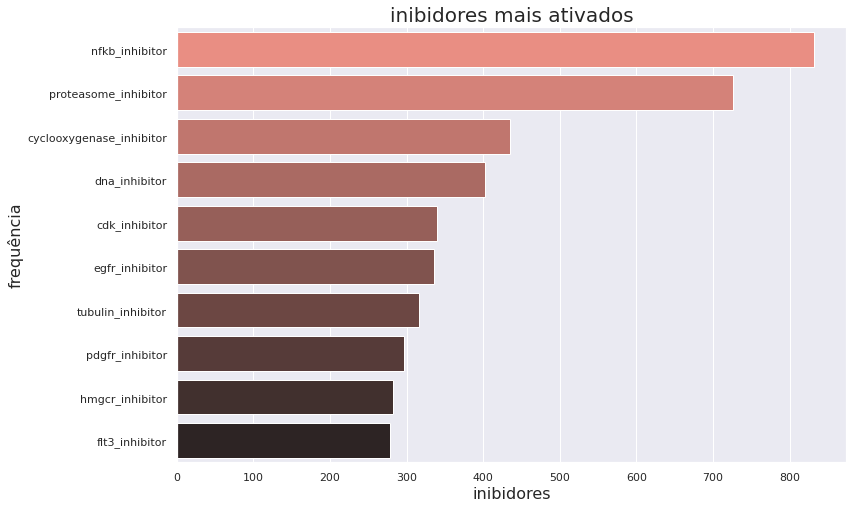

In [ ]:
inibidores = moa[moa['moa'].str.contains('inhibitor')] 

plt.figure(figsize = (12,8))
ax = sns.barplot(x = 'indice_ativacao', y = 'moa' , data = inibidores.iloc[:10], palette='dark:salmon_r')

ax.set_title('Inibidores que foram mais ativados', fontsize = 20, )
ax.set_xlabel('Inibidores', fontsize = 16)
ax.set_ylabel('Frequência', fontsize = 16)
plt.show()


Explorando o conjunto dos resultados e determinando quais os mecanismos que são classificados como atagonistas que foram mais ativados. 

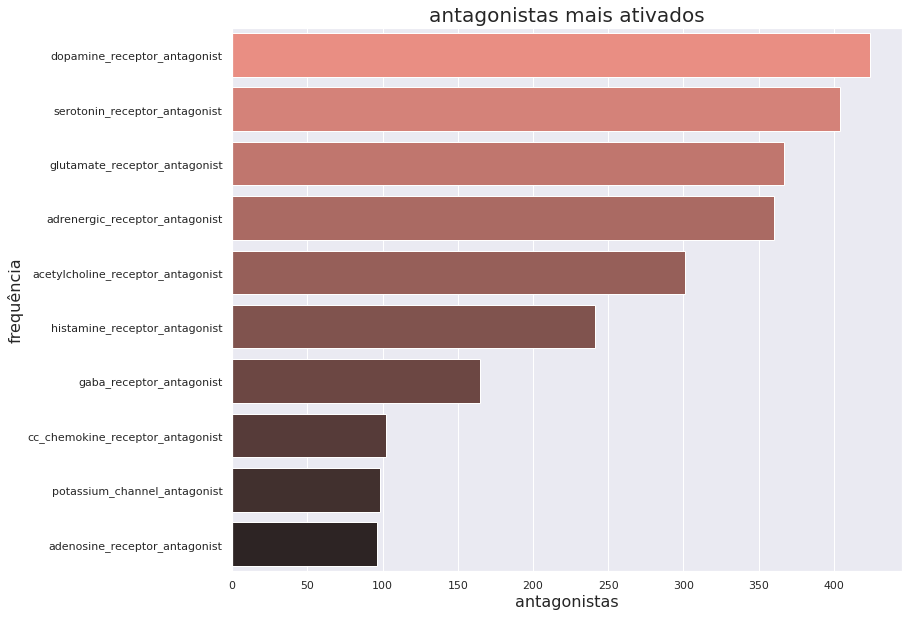

In [ ]:
ant = moa[moa['moa'].str.contains('antagonist')]

plt.figure(figsize = (12,10))
ax = sns.barplot(x = 'indice_ativacao', y = 'moa' , data = ant.iloc[:10], palette='dark:salmon_r')

ax.set_title('antagonistas mais ativados', fontsize = 20, )
ax.set_xlabel('antagonistas', fontsize = 16)
ax.set_ylabel('frequência', fontsize = 16)
plt.show()

Observando o conjunto dos mais ativados:

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


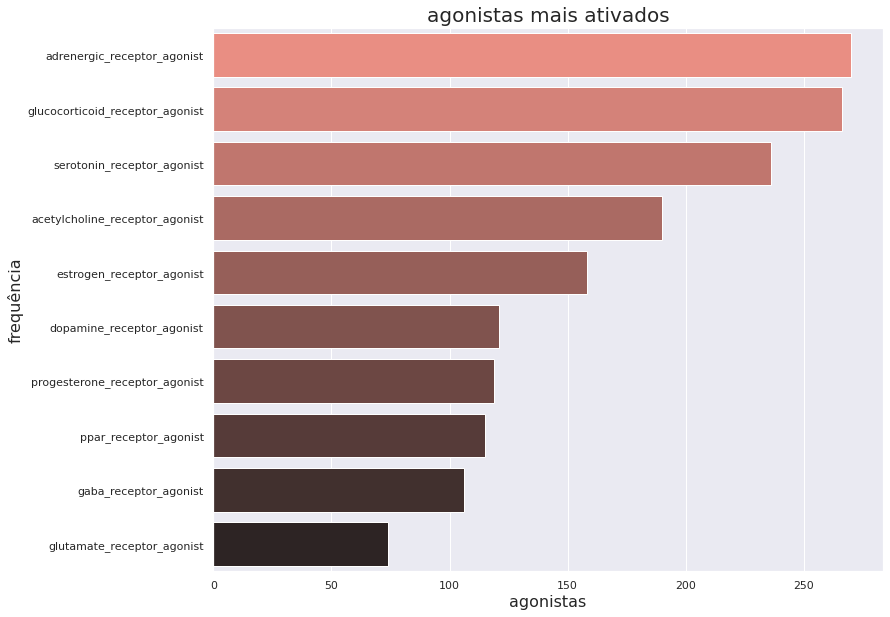

In [ ]:
agonistas = moa[moa['moa'].str.contains('agonist')]
index_antagonistas = (agonistas[agonistas['moa'].str.contains('antagonist')]).index
agonistas.drop(index_antagonistas, inplace = True)

plt.figure(figsize = (12,10))
ax = sns.barplot(x = 'indice_ativacao', y = 'moa' , data = agonistas.iloc[:10], palette='dark:salmon_r')

ax.set_title('agonistas mais ativados', fontsize = 20, )
ax.set_xlabel('agonistas', fontsize = 16)
ax.set_ylabel('frequência', fontsize = 16)
plt.show()

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('default')

Explorando o conjuto que contém os resultados e retornando o número de vezes que houve uma ativação em cada experimento que foi realizado. Vamos salvar essa série em uma nova coluna. 

In [ ]:
df_resultados.drop('id', axis = 1).sum(axis =1)
df_resultados['n_moa'] = df_resultados.drop('id', axis = 1).sum(axis =1)

df_resultados['n_moa'] != 0
df_resultados['ativo_moa'] = (df_resultados['n_moa'] != 0)

df = pd.merge(df_dados, df_resultados[['id', 'n_moa', 'ativo_moa']], on = 'id')
df

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,7.0,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0.0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,15.0,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0.0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,7.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6

Aqui usamos o retorno true/false para saber se houve ou não uma ativação em cada experimento realizado, salvamos essa série em uma coluna no nosso conjunto resultados e criamos um conjunto através da combinação entre os conjuntos: dados e resultados. 

In [ ]:
df['eh_controle'] = (df['tratamento'] != 'com_droga')

df['tempo_24'] = (df['tempo'] == 24)
df['tempo_48'] = (df['tempo'] == 48)
df['tempo_72'] = (df['tempo'] == 72)

print('controle \n', df.query('droga == "cacb2b860"' )['id'].count())
print('\n composto 87d714366 \n', df.query('droga == "87d714366"' )['id'].count())
print('\n composto 9f80f3f77 \n', df.query('droga == "9f80f3f77"' )['id'].count())
print('\n composto 8b87a7a83 \n', df.query('droga == "8b87a7a83"' )['id'].count())
print('\n composto 5628cb3ee \n', df.query('droga == "5628cb3ee"' )['id'].count())


controle 
 1866

 composto 87d714366 
 718

 composto 9f80f3f77 
 246

 composto 8b87a7a83 
 203

 composto 5628cb3ee 
 202


Criamos também uma nova coluna para "eh_contro", criamos três colunas para indicar as separações temporais(72, 48, 24) e vizualizando o número de ocorrências dos 4 compostos mais o controle. 

In [ ]:
print('controle \n', df.query('droga == "cacb2b860"' )['ativo_moa'].value_counts())
print('\n composto 87d714366 \n', df.query('droga == "87d714366"' )['ativo_moa'].value_counts())
print('\n composto 9f80f3f77 \n', df.query('droga == "9f80f3f77"' )['ativo_moa'].value_counts())
print('\n composto 8b87a7a83 \n', df.query('droga == "8b87a7a83"' )['ativo_moa'].value_counts())
print('\n composto 5628cb3ee \n', df.query('droga == "5628cb3ee"' )['ativo_moa'].value_counts())

print('\033[1m' + '\n Verificamos que há ativação de ao menos um mecanismo em todos os compostos analisados e em todas suas ocorrências' + '\033[1m')

controle 
 False    1866
Name: ativo_moa, dtype: int64

 composto 87d714366 
 True    718
Name: ativo_moa, dtype: int64

 composto 9f80f3f77 
 True    246
Name: ativo_moa, dtype: int64

 composto 8b87a7a83 
 True    203
Name: ativo_moa, dtype: int64

 composto 5628cb3ee 
 True    202
Name: ativo_moa, dtype: int64

 Verificamos que há ativação de ao menos um mecanismo em todos os compostos analisados e em todas suas ocorrências


In [ ]:
composto_principal = df['droga'].value_counts().index[:5]
x = df[df['n_moa'] > 1].query('droga in @composto_principal')

print('\n composto 87d714366 \n', x.query('droga == "87d714366"').shape[0])
print('\n composto 9f80f3f77 \n', x.query('droga == "9f80f3f77"').shape[0])
print('\n composto 8b87a7a83 \n', x.query('droga == "8b87a7a83"').shape[0])
print('\n composto 5628cb3ee \n', x.query('droga == "5628cb3ee"').shape[0])

print('\033[1m' + '\n Verificamos que o composto 87d714366 é o único a ativar mais de um mecanismo e o faz em todas suas ocorrências' + '\033[1m')


 composto 87d714366 
 718

 composto 9f80f3f77 
 246

 composto 8b87a7a83 
 203

 composto 5628cb3ee 
 202

 Verificamos que o composto 87d714366 é o único a ativar mais de um mecanismo e o faz em todas suas ocorrências


In [ ]:
# criando colunas contendo, respectivamente: as médias de expressão gênica e viabilidade celular

colunas_g = df.iloc[:, 5:777].columns
colunas_c = df.iloc[:, 777:877].columns
df['media_g'] = df[colunas_g].mean(axis=1)
df['media_c'] = df[colunas_c].mean(axis=1)

In [ ]:
df.to_csv('dados_drug_discovery.csv', index = False)


In [ ]:
a = df[(df['dose'] == 'D1') & (df['tempo'] == 24)].query('droga in @composto_principal')
b = df[(df['dose'] == 'D1') & (df['tempo'] == 48)].query('droga in @composto_principal')
c = df[(df['dose'] == 'D1') & (df['tempo'] == 72)].query('droga in @composto_principal')
d = df[(df['dose'] == 'D2') & (df['tempo'] == 24)].query('droga in @composto_principal')
e = df[(df['dose'] == 'D2') & (df['tempo'] == 48)].query('droga in @composto_principal')
f = df[(df['dose'] == 'D2') & (df['tempo'] == 72)].query('droga in @composto_principal')

**Salvamos o conjunto resultando em formato csv para podermos usar mais tarde.**

Criamos um subconjunto para futuras análises. Há uma divisão pela dose vs tempo, incluindo os 5 mais frequentes. 

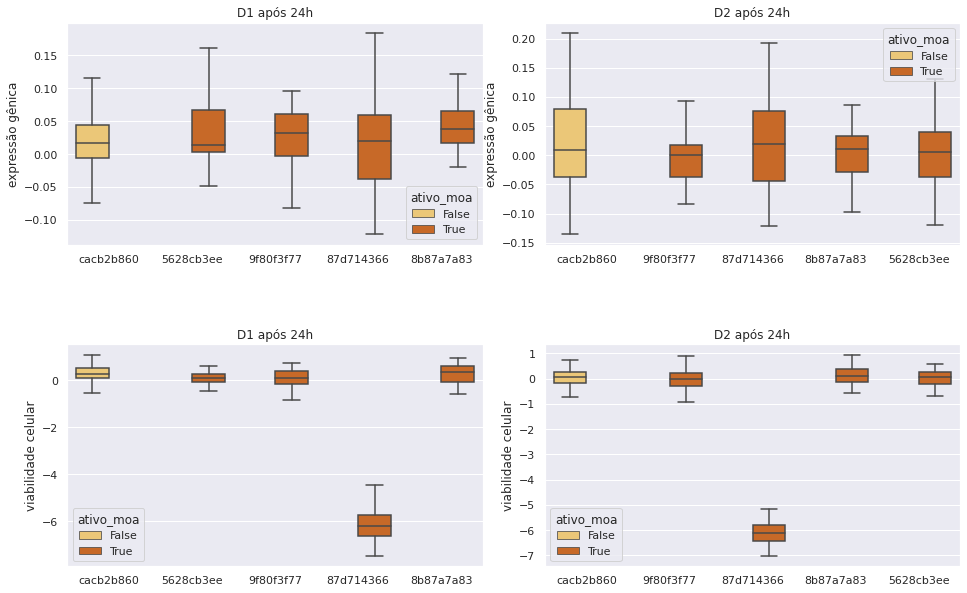

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (16,10), sharex = 'col', sharey = 'row')
plt.subplots_adjust(wspace = 0.15, hspace = 0.45)
plt.suptitle('')

plt.subplot(2,2,1, title = 'D1 após 24h')
ax1 = sns.boxplot(data = a, y= 'media_g', x='droga', hue='ativo_moa', showfliers = False,palette='YlOrBr')
ax1.set_xlabel('')
ax1.set_ylabel('expressão gênica')

plt.subplot(2,2,2, title = 'D2 após 24h')
ax2 = sns.boxplot(data = d, y= 'media_g', x='droga', hue='ativo_moa', showfliers = False,palette='YlOrBr')
ax2.set_xlabel('')
ax2.set_ylabel('expressão gênica')

plt.subplot(2,2,3, title = 'D1 após 24h')
ax3 = sns.boxplot(data = a, y= 'media_c', x='droga', hue='ativo_moa', showfliers = False,palette='YlOrBr')
ax3.set_xlabel('')
ax3.set_ylabel('viabilidade celular')

plt.subplot(2,2,4, title = 'D2 após 24h')
ax4 = sns.boxplot(data = d, y= 'media_c', x='droga', hue='ativo_moa', showfliers = False,palette='YlOrBr')
ax4.set_xlabel('')
ax4.set_ylabel('viabilidade celular')

plt.show()

###Agora analisando a distribuição das médias de expressão e viabilidade celular (D1 e D2 / 48h

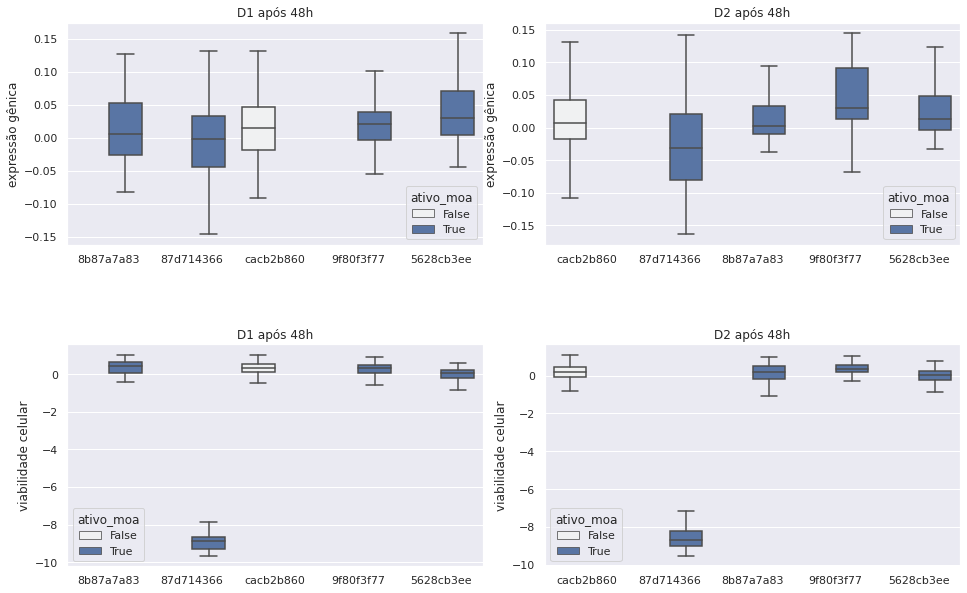

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (16,10), sharex = 'col', sharey = 'row')
plt.subplots_adjust(wspace = 0.15, hspace = 0.45)
plt.suptitle('')

plt.subplot(2,2,1, title = 'D1 após 48h')
ax1 = sns.boxplot(data = b, y= 'media_g', x='droga', hue='ativo_moa', showfliers = False, palette ='light:b' )
ax1.set_xlabel('')
ax1.set_ylabel('expressão gênica')

plt.subplot(2,2,2, title = 'D2 após 48h')
ax2 = sns.boxplot(data = e, y= 'media_g', x='droga', hue='ativo_moa', showfliers = False, palette ='light:b')
ax2.set_xlabel('')
ax2.set_ylabel('expressão gênica')

plt.subplot(2,2,3, title = 'D1 após 48h')
ax3 = sns.boxplot(data = b, y= 'media_c', x='droga', hue='ativo_moa', showfliers = False, palette ='light:b')
ax3.set_xlabel('')
ax3.set_ylabel('viabilidade celular')

plt.subplot(2,2,4, title = 'D2 após 48h')
ax4 = sns.boxplot(data = e, y= 'media_c', x='droga', hue='ativo_moa', showfliers = False, palette ='light:b')
ax4.set_xlabel('')
ax4.set_ylabel('viabilidade celular')

plt.show()

###Analisando a distribuição das médias de expressão gênica e viabilidade celular (D1 e D2 | 72h)

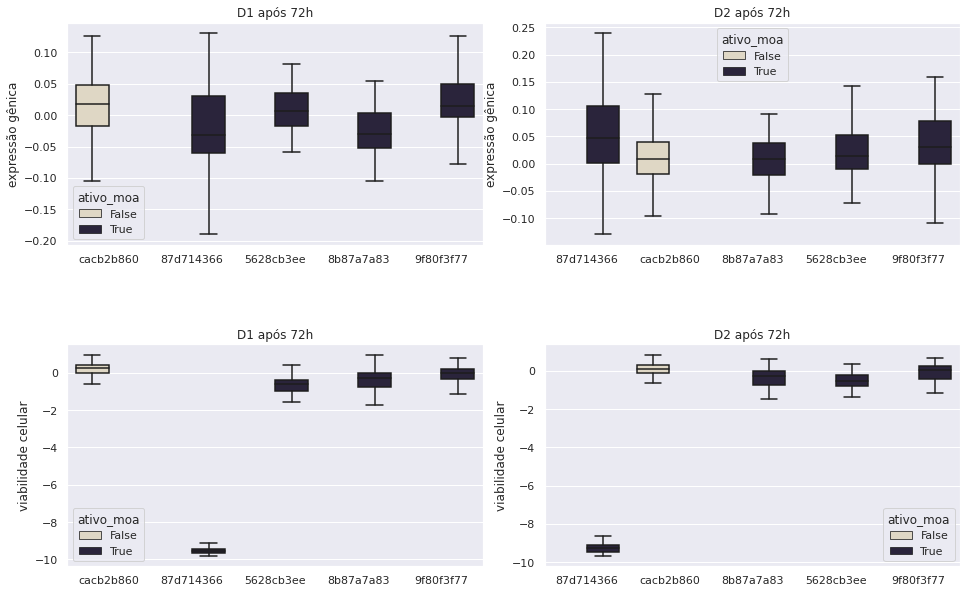

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (16,10), sharex = 'col', sharey = 'row')
plt.subplots_adjust(wspace = 0.15, hspace = 0.45)
plt.suptitle('')

plt.subplot(2,2,1, title = 'D1 após 72h')
ax1 = sns.boxplot(data = c, y= 'media_g', x='droga', hue='ativo_moa', showfliers = False, palette ='ch:s=-.2,r=.6')
ax1.set_xlabel('')
ax1.set_ylabel('expressão gênica')

plt.subplot(2,2,2, title = 'D2 após 72h')
ax2 = sns.boxplot(data = f, y= 'media_g', x='droga', hue='ativo_moa', showfliers = False,  palette ='ch:s=-.2,r=.6')
ax2.set_xlabel('')
ax2.set_ylabel('expressão gênica')

plt.subplot(2,2,3, title = 'D1 após 72h')
ax3 = sns.boxplot(data = c, y= 'media_c', x='droga', hue='ativo_moa', showfliers = False,  palette ='ch:s=-.2,r=.6')
ax3.set_xlabel('')
ax3.set_ylabel('viabilidade celular')

plt.subplot(2,2,4, title = 'D2 após 72h')
ax4 = sns.boxplot(data = f, y= 'media_c', x='droga', hue='ativo_moa', showfliers = False,  palette ='ch:s=-.2,r=.6')
ax4.set_xlabel('')
ax4.set_ylabel('viabilidade celular')

plt.show()

Observando agora a correlação da viabilidade celular vs expressão gênica: Correlação negativa

<Figure size 1152x576 with 0 Axes>

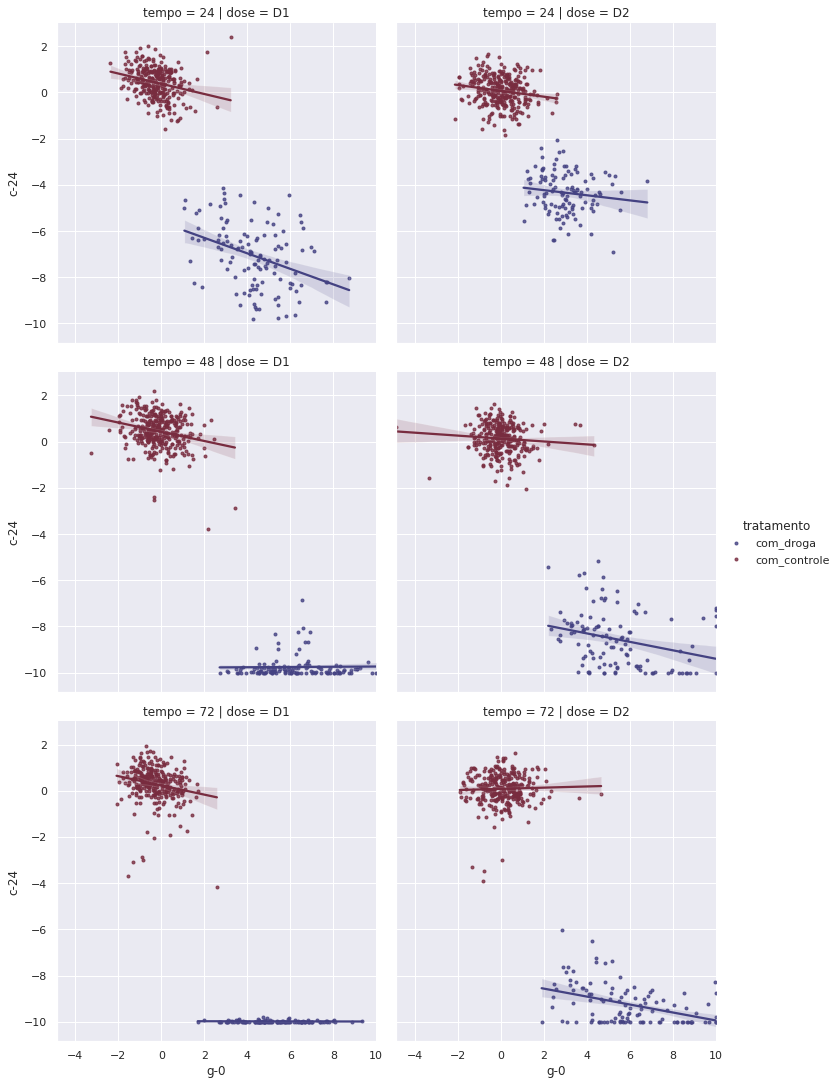

In [ ]:
g = df[(df['droga'] == 'cacb2b860') | (df['droga'] == '87d714366')]
                 
plt.figure(figsize = (16,8))
                 
sns.lmplot(x='g-0', y = 'c-24', data = g, col = 'dose', row = 'tempo',hue = 'tratamento', markers = '.', palette='icefire')

                
plt.show()

Agora a correlação positiva

<Figure size 1152x576 with 0 Axes>

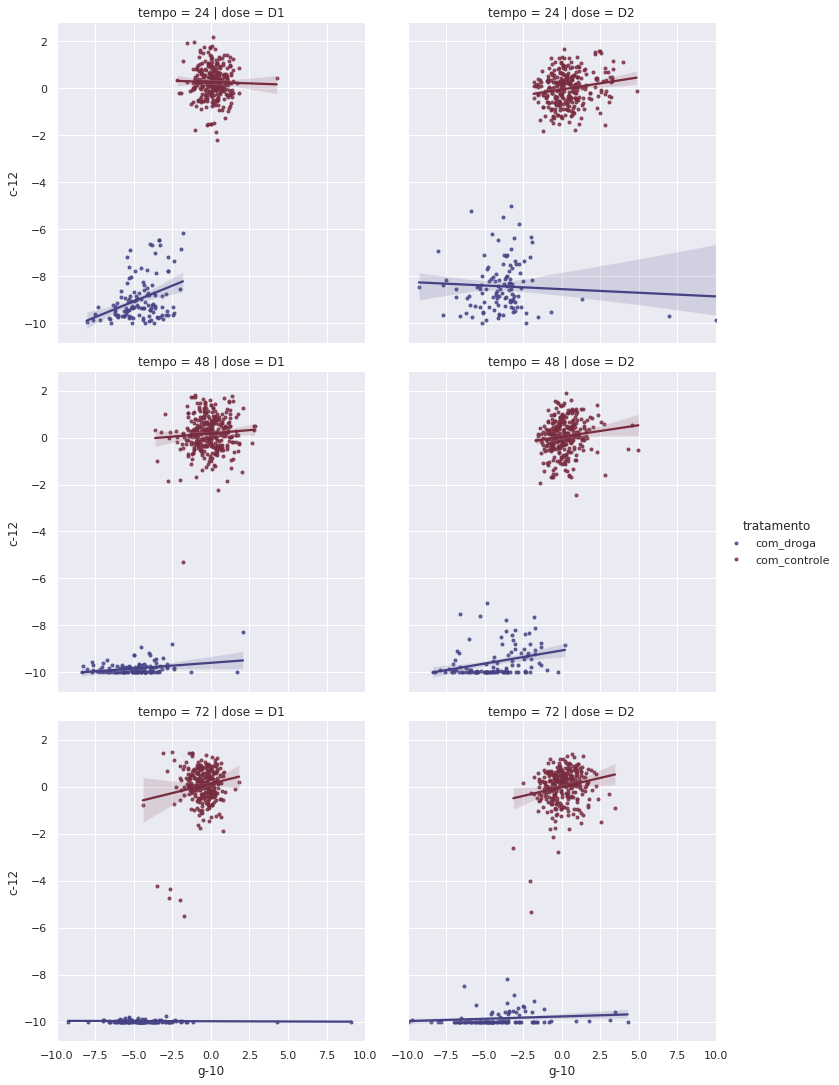

In [ ]:
plt.figure(figsize = (16,8))
sns.lmplot(x='g-10', y = 'c-12', data = g, col = 'dose', row = 'tempo',hue = 'tratamento', markers = '.',palette='icefire')            
plt.show()

**Observando a distribuição das médias de expressão gênica e a viabilidade celular. (D1,D2 por 24 horas) x (D1,D2 por 48 horas) x (D1,D2 por 72 horas).**


É possível aferir que não há nenhuma diferença significativa, mas uma diferença surgiu na viabilidade celular observada no composto 87d714366 em relação ao controle nos diferentes tratamentos, o que levou a repetir a análise para verificar a correlação da viabilidade celular vs expressão gênica. 


**Correlação da viabilidade celular vs expressão gênica, analisando a correlação negativa**

É visível que na presença da droga a maior expressão do gene 0 é concomitante a menor viabilidade de c-24, e o mesmo não é observado no tratamento com controle. Isso pode indicar que a droga ao influenciar o aumento da expressão desse gene em questão poderia estar prejudicando a viabilidade deste grupo celular. 

**Correlação positiva**
Neste caso existem alguns indicativos de que a maior expressão de g-10 acompanha a maior viabilidade de c-12, porém na preseça da droga em relação ao controle a expressão desse gene parece estar suprimida assim como a viabilidade celular.
Concluimos então a partir destes dados podemos concluir que há indicativos que respaldam mais investigações a respeito do mecanismo de ação do composto 87d714366 visto este apresentar um comportamento que difere muito do tratamento controle.